In [53]:
#Note to self: Please see other version of Unit 2.4.4 (2 models) for a better explanation at how I arrived at this model

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

In [54]:
df = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 2\\NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013.csv',
                 header = 4)

In [55]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


In [56]:
#Drop footnotes from dataset
df.drop(df.index[348:351], inplace = True)

In [57]:
#Remove commas from numbers, remove spaces before and after entries (if they exist)
for col in df.columns:
    df[col]= df[col].apply(lambda x: str(x).replace(',', ''))
    df[col]= df[col].apply(lambda x: str(x).strip())

#Convert str cols to float so we can do some graphing
numerical_columns = df.columns[1:]
for num_col in numerical_columns:
    df[num_col]= df[num_col].apply(lambda x: float(x))

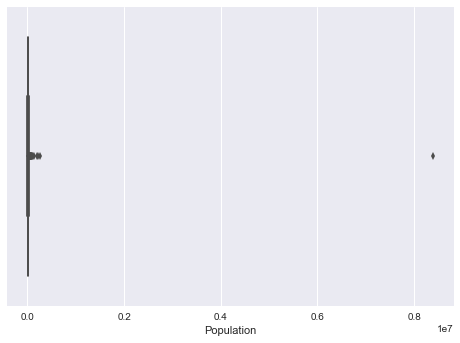

In [58]:

sns.boxplot(df.Population)
plt.show()

#Clearly there is an outlier datapoint for population (New York City) - but how do we handle. Drop from model? Scale down by 10X?
#Scale down by 100X?

In [59]:
#Find New York in the dataset:
nyc_index = df[df['City'] == 'New York'].index.tolist()

#New York is at index 216, so divide that row by 100 to 'normalize' the data 

for num_col in numerical_columns:
    df.ix[216:216, num_col] = df.ix[216:216 , num_col].divide(100)
    
#This took an embarrassing amount of time to figure out how to code correctly. Is there a better way?

df[df['City'] == 'New York']['Population']

216    83961.26
Name: Population, dtype: float64

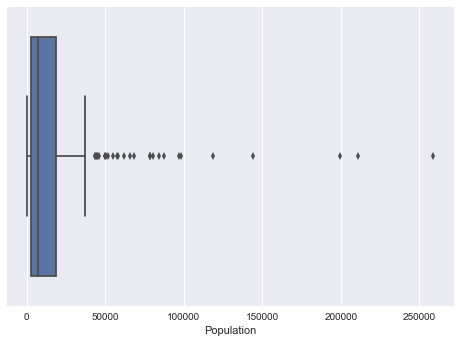

In [60]:
sns.boxplot(df.Population)
plt.show()

In [61]:
df['Robbery_Binary'] = df['Robbery'].apply(lambda x: 1 if x > 0 else 0)
df['Murder_Binary'] = df['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 1 if x > 0 else 0)


In [62]:
#Fill NA's with zeros
df.fillna(0, inplace = True)

In [63]:
df2 = pd.DataFrame()
df2['City'] = df['City']
df2['Population'] = df['Population']
df2['Population_Sq'] = df['Population'] * df['Population']
df2['Robbery_Binary'] = df['Robbery_Binary']
df2['Robbery'] = df['Robbery']
df2['Murder_Binary'] = df['Murder_Binary']
df2['Murder'] = df['Murder and\nnonnegligent\nmanslaughter']
df2['Violent_Crime_PP'] = df['Violent\ncrime']/df['Population']
df2['Property Crime'] = df['Property\ncrime']
df2.head()

,City,Population,Population_Sq,Robbery_Binary,Robbery,Murder_Binary,Murder,Violent_Crime_PP,Property Crime
0,Adams Village,1861.0,3.463321e+06,0,0.0,0,0.0,0.000000,12.0
1,Addison Town and Village,2577.0,6.640929e+06,0,0.0,0,0.0,0.001164,24.0
2,Akron Village,2846.0,8.099716e+06,0,0.0,0,0.0,0.001054,16.0
3,Albany,97956.0,9.595378e+09,1,227.0,1,8.0,0.008075,4090.0
4,Albion Village,6388.0,4.080654e+07,1,4.0,0,0.0,0.003601,223.0


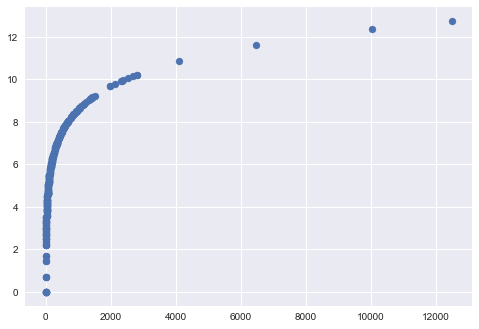

In [64]:
#Let's try a box-cox transform

#6 cities have 0 property crime - can't use zeros in box-cox transform
#Try adding a value of 1 to every city (ONLY IF IT HAS ZERO)  
df2['Property Crime V2'] = df2['Property Crime'].apply(lambda x: x+1 if x == 0 else x)

#133 cities have 0 robberies (so the log transform results in a value of -inf, which is not usable.)
#Try adding a value of 1 to every city  

df2['Robbery V2'] = df2['Robbery'] + 1
df2['Robbery_log'] = np.log(df2['Robbery V2'])

#Some cities have 0 murders (so the log transform results in a value of -inf, which is not usable.)
#Try adding a value of 1 to every city  
df2['Murder V2'] = df2['Murder'] + 1
df2['Murder_log'] = np.log(df2['Murder V2'])

#Some cities have 0 violent crimes (so the log transform results in a value of -inf, which is not usable.)
#Try adding a value of 1 to every city  
df2['Violent_Crime_PP V2'] = (df['Violent\ncrime'] + 1)/df['Population']
df2['VCPP_log'] = np.log(df2['Violent_Crime_PP V2'])

df2['Population_log'] = np.log(df2['Population'])


from scipy.stats import boxcox

bc = boxcox(df2['Property Crime V2'])

plt.scatter(df2['Property Crime V2'], bc[0])
plt.show()

df2['Property_Crime_BC_Transform'] = bc[0]


In [65]:
print(len(df2))
#We kept all 348 datapoints by adding "1" to relevant columns

348


In [66]:
#Check for linearity w/ dependent var

#g = sns.PairGrid(df2)
#g = g.map_diag(plt.hist)
#g = g.map_offdiag(plt.scatter)               
#plt.show()

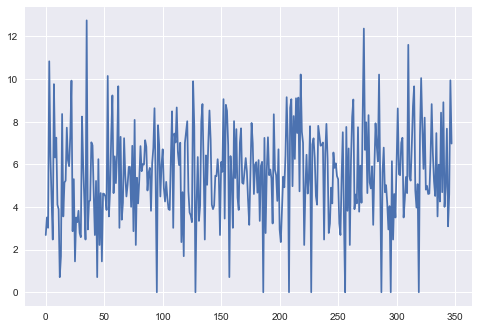

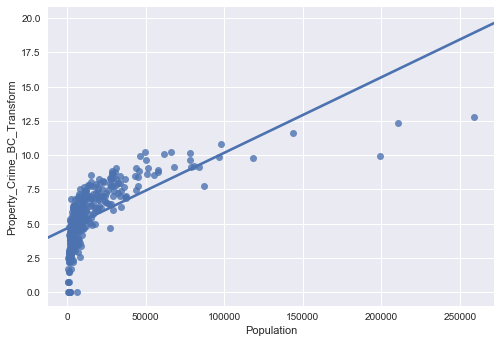

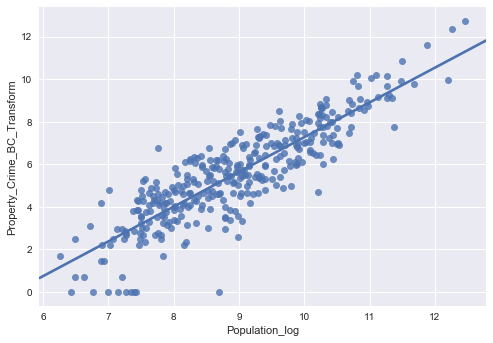

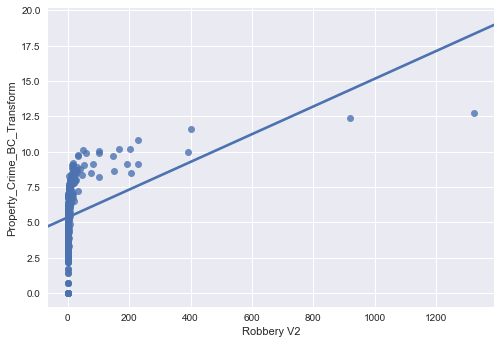

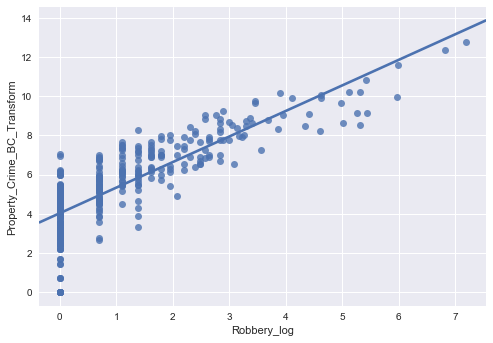

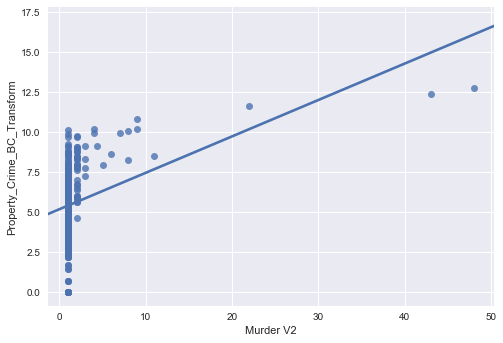

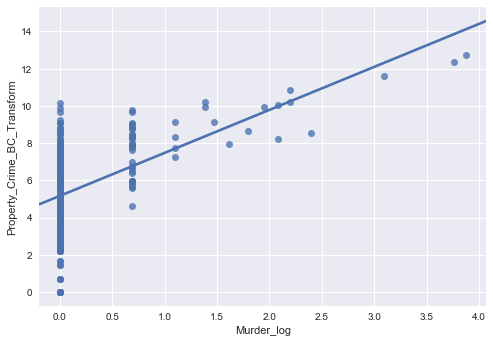

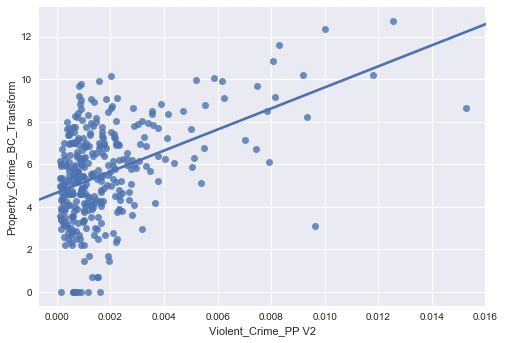

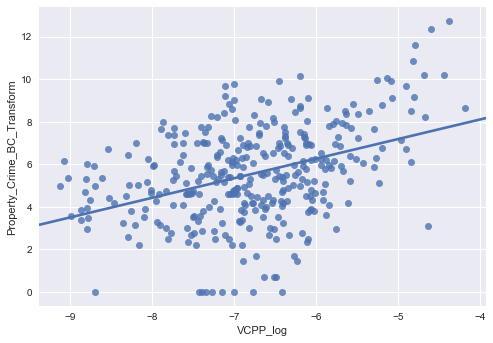

In [67]:
#test linearity between predictors & outcome...

#log for population and robbery seemed to be linearly related w/ dependent variable..but will need to drop -inf values later

plt.plot(df2['Property_Crime_BC_Transform'])
plt.show()

sns.regplot(df2['Population'], df2['Property_Crime_BC_Transform'], ci = False)
plt.show()

sns.regplot(df2['Population_log'], df2['Property_Crime_BC_Transform'], ci = False)
plt.show()

sns.regplot(df2['Robbery V2'], df2['Property_Crime_BC_Transform'], ci = False)
plt.show()

sns.regplot(df2['Robbery_log'], df2['Property_Crime_BC_Transform'], ci = False)
plt.show()

sns.regplot(df2['Murder V2'], df2['Property_Crime_BC_Transform'], ci = False)
plt.show()

sns.regplot(df2['Murder_log'], df2['Property_Crime_BC_Transform'], ci = False)
plt.show()

sns.regplot(df2['Violent_Crime_PP V2'], df2['Property_Crime_BC_Transform'], ci = False)
plt.show()

sns.regplot(df2['VCPP_log'], df2['Property_Crime_BC_Transform'], ci = False)
plt.show()

In [68]:
#Population log and robbery log look to be pretty good predictors of the transformed dependent variable... let's try the model
#with these two (and maybe murder_log and violent crimes per person (not log version))

In [69]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

X = df2[['Population_log', 'Robbery_log', 'Murder_log', 'VCPP_log']]
Y = df2['Property_Crime_BC_Transform']

regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1.55859547  0.08910242 -0.34112655  0.70266523]

Intercept: 
 -3.67260350753

R-squared:
0.849691665211


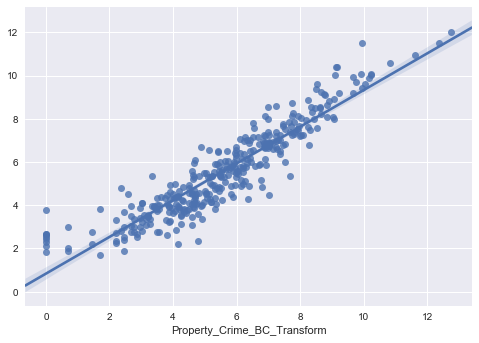

In [70]:
predicted = regr.predict(X).ravel()
actual = df2['Property_Crime_BC_Transform']

residual = actual - predicted

sns.regplot(actual, predicted)
plt.show()

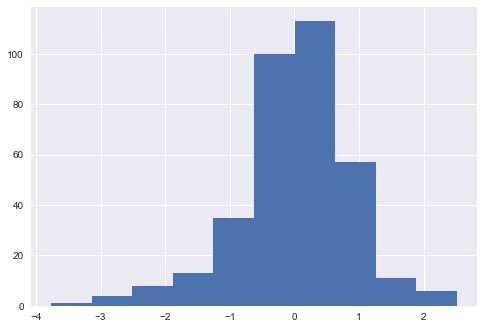

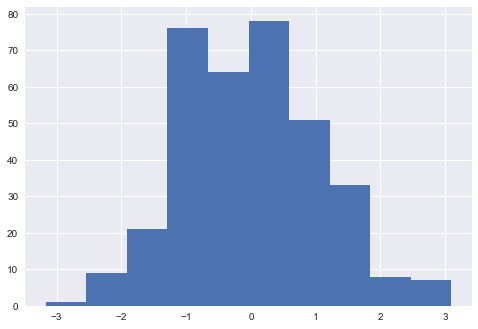

In [71]:
plt.hist(residual)
plt.show()

norm = np.random.normal(0,1,len(residual))
plt.hist(norm)
plt.show()

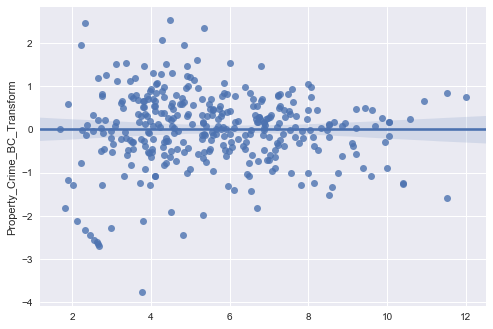

In [72]:
sns.regplot(predicted, residual, fit_reg = True)
plt.show()

In [73]:
#Residuals do not demonstrate heteroscedasticity (no bias for a given range of predicted values)

c:\users\ryan\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


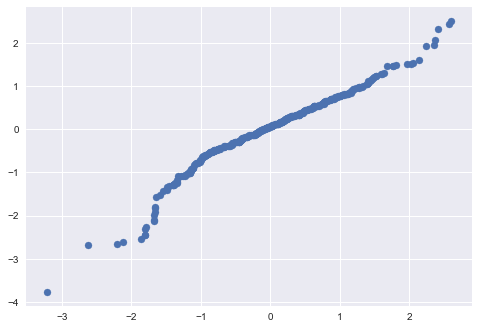

In [74]:
norm = np.random.normal(0,1,len(residual))
norm.sort()

residual.sort()
plt.scatter(norm, residual)
plt.show()

#Residual distribution is pretty normal-looking

In [75]:
#perform F-test and t-tests on Original model

from scipy.stats import f
import statsmodels.formula.api as smf


#T-TESTS
# Write out the model formula.
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Property_Crime_BC_Transform ~ Population_log + Robbery_log + Murder_log + VCPP_log'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df2).fit()

In [78]:
#Evaluate parameter signficance (t-tests on p values for params)

lm.params

Intercept        -3.672604
Population_log    1.558595
Robbery_log       0.089102
Murder_log       -0.341127
VCPP_log          0.702665
dtype: float64

In [79]:
lm.pvalues

Intercept         4.584540e-11
Population_log    3.777870e-56
Robbery_log       3.157747e-01
Murder_log        9.438671e-03
VCPP_log          1.264559e-18
dtype: float64

In [80]:
lm.rsquared

0.84969166521067541

In [115]:
#Robbery_log does not pass the p-value test (p > 0.05), so we can safely drop this predictor from our model
from sklearn import linear_model

regr = linear_model.LinearRegression()

X = df2[['Population_log', 'Murder_log', 'VCPP_log']]
Y = df2['Property_Crime_BC_Transform']

regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


from scipy.stats import f
import statsmodels.formula.api as smf


#T-TESTS
# Write out the model formula.
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Property_Crime_BC_Transform ~ Population_log + Murder_log + VCPP_log'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df2).fit()


Coefficients: 
 [ 1.6258887  -0.29082845  0.7540165 ]

Intercept: 
 -3.83067755118

R-squared:
0.849249365503


In [116]:
lm.params

Intercept        -3.830678
Population_log    1.625889
Murder_log       -0.290828
VCPP_log          0.754017
dtype: float64

In [117]:
lm.pvalues

Intercept          9.410098e-13
Population_log    3.845645e-116
Murder_log         1.650494e-02
VCPP_log           3.182509e-34
dtype: float64

In [118]:
lm.rsquared

0.84924936550292063

In [134]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Property_Crime_BC_Transform   R-squared:                       0.849
Model:                                     OLS   Adj. R-squared:                  0.848
Method:                          Least Squares   F-statistic:                     646.0
Date:                         Sun, 23 Apr 2017   Prob (F-statistic):          6.26e-141
Time:                                 20:23:10   Log-Likelihood:                -444.09
No. Observations:                          348   AIC:                             896.2
Df Residuals:                              344   BIC:                             911.6
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.8307      0.516     -7.417      0.000      -4.846      -2.815
Population_log     1.6259      0.046     35.223      0.000       1.535       1.717
Murder_log        -0.2908      0.121     -2.409      0.017      -0.528      -0.053
VCPP_log           0.7540      0.055     13.656      0.000       0.645       0.863
==============================================================================
Omnibus:                       33.810   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.878
Skew:                          -0.577   Prob(JB):                     6.03e-14
Kurtosis:                       4.693   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

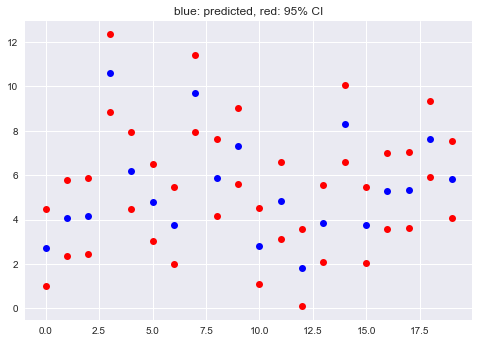

In [139]:
# Use wls_prediction_std to build confidence intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:20], 'o', color='r')
plt.plot(iv_l[0:20], 'o', color='r')
plt.plot(lm.fittedvalues[0:20], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

In [119]:
#Now load and clean California & Florida datasets for cross-validation purposes. Only keep features that pass t-tests. 
#Evaluate F-statistic for the overall model as well, make sure the model explains some variance.


In [120]:
ca_df = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 2\\table_8_offenses_known_to_law_enforcement_california_by_city_2013.csv',
                 header = 4)

fl_df = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 2\\table_8_offenses_known_to_law_enforcement_florida_by_city_2013.csv',
                 header = 4)

#Drop footnotes from dataset
ca_df.drop(ca_df.index[462:464], inplace = True)
fl_df.drop(fl_df.index[290:293], inplace = True)

In [121]:
#Append FL dataset to CA
ca_fl_df = ca_df.append(fl_df)

In [122]:
#Remove commas from numbers, remove spaces before and after entries (if they exist)
for col in ca_fl_df.columns:
    ca_fl_df[col]= ca_fl_df[col].apply(lambda x: str(x).replace(',', ''))
    ca_fl_df[col]= ca_fl_df[col].apply(lambda x: str(x).strip())

#Convert str cols to float so we can do some graphing
numerical_columns = ca_fl_df.columns[1:]
for num_col in numerical_columns:
    ca_fl_df[num_col]= ca_fl_df[num_col].apply(lambda x: float(x))

In [123]:
ca_fl_df['Robbery_Binary'] = ca_fl_df['Robbery'].apply(lambda x: 1 if x > 0 else 0)
ca_fl_df['Murder_Binary'] = ca_fl_df['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 1 if x > 0 else 0)

In [124]:
#Fill NA's with zeros
ca_fl_df.fillna(0, inplace = True)

In [125]:
ca_fl_df2 = pd.DataFrame()
ca_fl_df2['City'] = ca_fl_df['City']
ca_fl_df2['Population'] = ca_fl_df['Population']
ca_fl_df2['Population_Sq'] = ca_fl_df['Population'] * ca_fl_df['Population']
ca_fl_df2['Robbery_Binary'] = ca_fl_df['Robbery_Binary']
ca_fl_df2['Robbery'] = ca_fl_df['Robbery']
ca_fl_df2['Murder_Binary'] = ca_fl_df['Murder_Binary']
ca_fl_df2['Murder'] = ca_fl_df['Murder and\nnonnegligent\nmanslaughter']
ca_fl_df2['Violent_Crime_PP'] = ca_fl_df['Violent\ncrime']/ca_fl_df['Population']
ca_fl_df2['Property Crime'] = ca_fl_df['Property\ncrime']
ca_fl_df2.head()

,City,Population,Population_Sq,Robbery_Binary,Robbery,Murder_Binary,Murder,Violent_Crime_PP,Property Crime
0,Adelanto,31165.0,9.712572e+08,1,52.0,1,2.0,0.006353,886.0
1,Agoura Hills,20762.0,4.310606e+08,1,10.0,0,0.0,0.000915,306.0
2,Alameda,76206.0,5.807354e+09,1,85.0,0,0.0,0.002073,1902.0
3,Albany,19104.0,3.649628e+08,1,24.0,0,0.0,0.001518,557.0
4,Alhambra,84710.0,7.175784e+09,1,81.0,1,1.0,0.001924,1774.0


In [126]:
#Some cities have 0 property crime - can't use zeros in box-cox transform
#Try adding a value of 1 to every city (ONLY IF IT HAS ZERO)  
ca_fl_df2['Property Crime V2'] = ca_fl_df2['Property Crime'].apply(lambda x: x+1 if x == 0 else x)

#Some cities have 0 robberies (so the log transform results in a value of -inf, which is not usable.)
#Try adding a value of 1 to every city  

ca_fl_df2['Robbery V2'] = ca_fl_df2['Robbery'] + 1
ca_fl_df2['Robbery_log'] = np.log(ca_fl_df2['Robbery V2'])

#Some cities have 0 murders (so the log transform results in a value of -inf, which is not usable.)
#Try adding a value of 1 to every city  
ca_fl_df2['Murder V2'] = ca_fl_df2['Murder'] + 1
ca_fl_df2['Murder_log'] = np.log(ca_fl_df2['Murder V2'])

#Some cities have 0 violent crimes (so the log transform results in a value of -inf, which is not usable.)
#Try adding a value of 1 to every city  
ca_fl_df2['Violent_Crime_PP V2'] = (ca_fl_df['Violent\ncrime'] + 1)/ca_fl_df['Population']
ca_fl_df2['VCPP_log'] = np.log(ca_fl_df2['Violent_Crime_PP V2'])

ca_fl_df2['Population_log'] = np.log(ca_fl_df2['Population'])

In [127]:
ca_fl_df2.head()

,City,Population,Population_Sq,Robbery_Binary,Robbery,Murder_Binary,Murder,Violent_Crime_PP,Property Crime,Property Crime V2,Robbery V2,Robbery_log,Murder V2,Murder_log,Violent_Crime_PP V2,VCPP_log,Population_log
0,Adelanto,31165.0,9.712572e+08,1,52.0,1,2.0,0.006353,886.0,886.0,53.0,3.970292,3.0,1.098612,0.006385,-5.053746,10.347051
1,Agoura Hills,20762.0,4.310606e+08,1,10.0,0,0.0,0.000915,306.0,306.0,11.0,2.397895,1.0,0.000000,0.000963,-6.945147,9.940880
2,Alameda,76206.0,5.807354e+09,1,85.0,0,0.0,0.002073,1902.0,1902.0,86.0,4.454347,1.0,0.000000,0.002086,-6.172291,11.241195
3,Albany,19104.0,3.649628e+08,1,24.0,0,0.0,0.001518,557.0,557.0,25.0,3.218876,1.0,0.000000,0.001570,-6.456456,9.857653
4,Alhambra,84710.0,7.175784e+09,1,81.0,1,1.0,0.001924,1774.0,1774.0,82.0,4.406719,2.0,0.693147,0.001936,-6.247123,11.346989


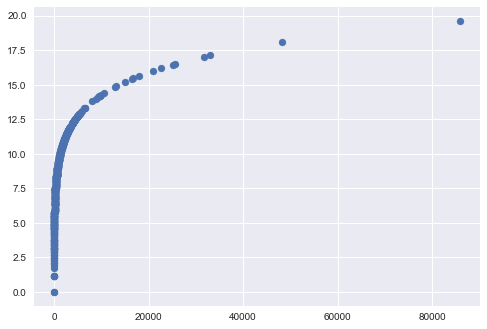

In [128]:
bc = boxcox(ca_fl_df2['Property Crime V2'])

plt.scatter(ca_fl_df2['Property Crime V2'], bc[0])
plt.show()

ca_fl_df2['Property_Crime_BC_Transform'] = bc[0]


In [129]:
from sklearn import cross_validation

In [130]:
X2 = ca_fl_df2[['Population_log', 'Murder_log', 'VCPP_log']]
Y2 = ca_fl_df2['Property_Crime_BC_Transform']

#Note I have not re-fit the model I developed based on the New York data. Will use the same fit from that model while validating
#on the CA/FL dataset

predict2 = regr.predict(X2).ravel()

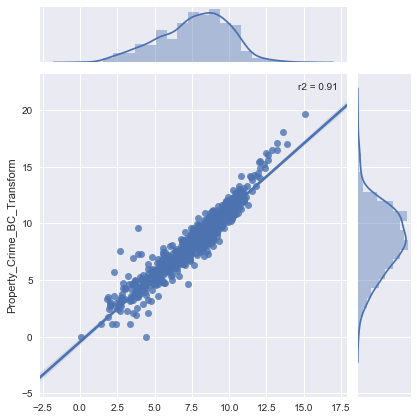

In [131]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(predict2, Y2, kind="reg", stat_func=r2)
plt.show()

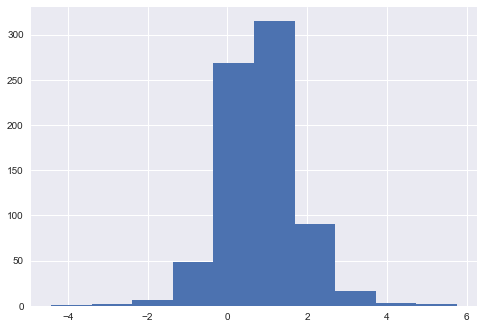

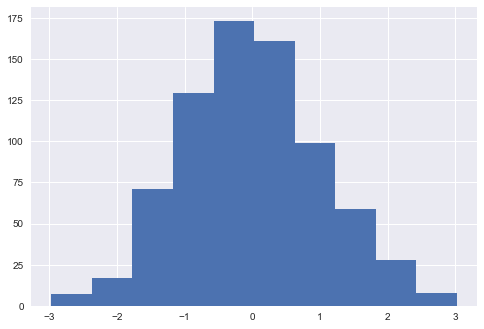

In [132]:
residual2 = Y2 - predict2

plt.hist(residual2)
plt.show()

norm2 = np.random.normal(0,1,len(residual2))
plt.hist(norm2)
plt.show()

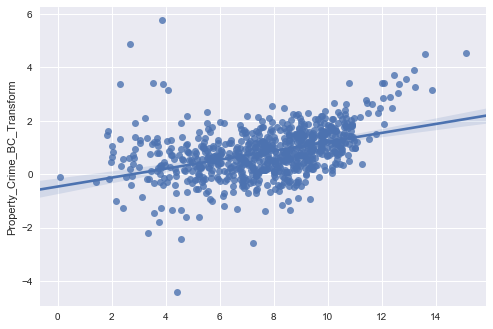

In [133]:
sns.regplot(predict2, residual2)
plt.show()